# Portfolio simulation
#### Using Vasicek 2 factor model

Both the yield curve and the inflation rates are assumed to follow a Vasicek model. The movement of the two curves is given by a two dimensional correlated Brownian motion.

In [1]:
from src.data import dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.optimize import minimize
from scipy.stats import norm

In [2]:
def vasicek(r0, K, theta, sigma, T, N, seed=None):
    np.random.seed(seed)
    dt = T / float(N)
    rates = [r0]
    for i in range(N):
        dr = K * (theta - rates[-1]) * dt + sigma * np.random.normal()
        rates.append(rates[-1] + dr)
    return range(N+1), rates

This function takes the initial short-term interest rate (r0), mean reversion rate (K), long-term interest rate (theta), volatility (sigma), time horizon (T), number of time steps (N), and a seed for the random number generator (seed).

In [3]:
zerocurve = dataset.Zerocurve()
zerocurve.load_data()

2023-03-15 16:43:12.912 | INFO     | src.data.dataset:read_data:141 - reading zero curve data from ESW.


In [4]:
data = zerocurve.df.pivot(columns = 'tenor', values = 'rate')

In [5]:
data.head()

tenor,1 Year,10 Years,15 Months,15 Years,18 Months,2 Years,3 Months,3 Years,30 Years,4 Years,5 Years,6 Months,7 Years,9 Months,ON
rate_dt,,,,,,,,,,,,,,,
2004-09-06,2.651565,5.217850,2.822715,5.367339,2.988139,3.298175,2.121240,3.825284,5.410036,4.232494,4.538927,2.298449,4.934807,2.476137,2.121240
2004-09-07,2.700174,5.193965,2.872345,5.346548,3.036262,3.338711,2.139612,3.844763,5.391362,4.233661,4.527671,2.332966,4.912476,2.520157,2.139612
2004-09-08,2.731688,5.195932,2.906993,5.343014,3.072722,3.375993,2.149441,3.877788,5.385502,4.259989,4.547567,2.352607,4.922632,2.546828,2.149441
2004-09-09,2.662770,5.158222,2.829146,5.324286,2.988434,3.284360,2.129304,3.784690,5.376611,4.173438,4.470124,2.311673,4.863580,2.489955,2.129304
2004-09-10,2.593700,5.136517,2.754329,5.302756,2.911134,3.208441,2.110625,3.722313,5.355005,4.125765,4.433397,2.268949,4.837977,2.431078,2.110625


In [8]:
r0 = data.iloc[0, :]

In [9]:
r0

tenor
1 Year       2.651565
10 Years     5.217850
15 Months    2.822715
15 Years     5.367339
18 Months    2.988139
2 Years      3.298175
3 Months     2.121240
3 Years      3.825284
30 Years     5.410036
4 Years      4.232494
5 Years      4.538927
6 Months     2.298449
7 Years      4.934807
9 Months     2.476137
ON           2.121240
Name: 2004-09-06 00:00:00, dtype: float64

In [23]:
import pandas as pd
from datetime import datetime
start_date = df.index.min()
end_date = df.index.max()
pred_end_date = datetime(2023,3,31)

In [55]:
yield_data = df.pivot(columns = 'tenor', values = 'rate')

In [56]:
yield_data.size

70920

In [57]:
yield_data.cov()

tenor,1 Year,10 Years,15 Months,15 Years,18 Months,2 Years,3 Months,3 Years,30 Years,4 Years,5 Years,6 Months,7 Years,9 Months,ON
tenor,,,,,,,,,,,,,,,
1 Year,2.635,2.135,2.645,2.085,2.647,2.636,2.456,2.578,2.170,2.499,2.415,2.560,2.267,2.610,2.456
10 Years,2.135,3.051,2.225,2.880,2.310,2.461,1.865,2.693,2.360,2.851,2.955,1.948,3.055,2.041,1.865
15 Months,2.645,2.225,2.666,2.166,2.677,2.680,2.442,2.642,2.215,2.575,2.498,2.551,2.358,2.610,2.442
15 Years,2.085,2.880,2.166,2.742,2.240,2.371,1.844,2.570,2.286,2.704,2.792,1.919,2.878,2.002,1.844
18 Months,2.647,2.310,2.677,2.240,2.696,2.713,2.426,2.696,2.255,2.642,2.574,2.537,2.442,2.604,2.426
2 Years,2.636,2.461,2.680,2.371,2.713,2.756,2.389,2.779,2.321,2.752,2.702,2.502,2.589,2.579,2.389
3 Months,2.456,1.865,2.442,1.844,2.426,2.389,2.387,2.304,1.995,2.213,2.125,2.452,1.981,2.463,2.387
3 Years,2.578,2.693,2.642,2.570,2.696,2.779,2.304,2.869,2.407,2.893,2.879,2.416,2.807,2.504,2.304
30 Years,2.170,2.360,2.215,2.286,2.255,2.321,1.995,2.407,2.288,2.449,2.460,2.064,2.433,2.120,1.995


In [58]:
yield_data.corr()

tenor,1 Year,10 Years,15 Months,15 Years,18 Months,2 Years,3 Months,3 Years,30 Years,4 Years,5 Years,6 Months,7 Years,9 Months,ON
tenor,,,,,,,,,,,,,,,
1 Year,1.000,0.753,0.998,0.776,0.993,0.978,0.979,0.938,0.884,0.895,0.855,0.990,0.794,0.998,0.979
10 Years,0.753,1.000,0.780,0.996,0.805,0.849,0.691,0.910,0.893,0.949,0.973,0.700,0.994,0.725,0.691
15 Months,0.998,0.780,1.000,0.801,0.998,0.989,0.968,0.955,0.897,0.917,0.880,0.981,0.821,0.992,0.968
15 Years,0.776,0.996,0.801,1.000,0.824,0.862,0.721,0.916,0.913,0.949,0.969,0.728,0.988,0.750,0.721
18 Months,0.993,0.805,0.998,0.824,1.000,0.995,0.956,0.969,0.908,0.936,0.901,0.970,0.845,0.984,0.956
2 Years,0.978,0.849,0.989,0.862,0.995,1.000,0.932,0.988,0.924,0.964,0.936,0.946,0.886,0.964,0.932
3 Months,0.979,0.691,0.968,0.721,0.956,0.932,1.000,0.881,0.854,0.833,0.791,0.997,0.729,0.989,1.000
3 Years,0.938,0.910,0.955,0.916,0.969,0.988,0.881,1.000,0.939,0.993,0.977,0.896,0.942,0.917,0.881
30 Years,0.884,0.893,0.897,0.913,0.908,0.924,0.854,0.939,1.000,0.941,0.935,0.857,0.914,0.870,0.854


In [59]:
rate_changes = np.log(yield_data / yield_data.shift(1)).dropna()

c:\Users\M\miniconda3\envs\rlalm\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [60]:
mu = rate_changes.mean().values
sigma = rate_changes.std().values

In [61]:
r0 = df1.iloc[-1].values # last observerd yield
T = 1 # time horizon
dt = 1/252 # time step

# Vasicek Interest Rate Model

https://www.investopedia.com/terms/v/vasicek-model.asp#:~:text=The%20term%20Vasicek%20Interest%20Rate,will%20move%20in%20the%20future.

In [62]:
def vasicek(r, mu, sigma, dt):
    return r + mu*dt + sigma*np.sqrt(dt)*np.random.normal()

In [63]:
yield_curve = [r0]
for i in range(int(T/dt)):
    r = yield_curve[-1]
    yield_curve.append(vasicek(r, mu, sigma, dt))

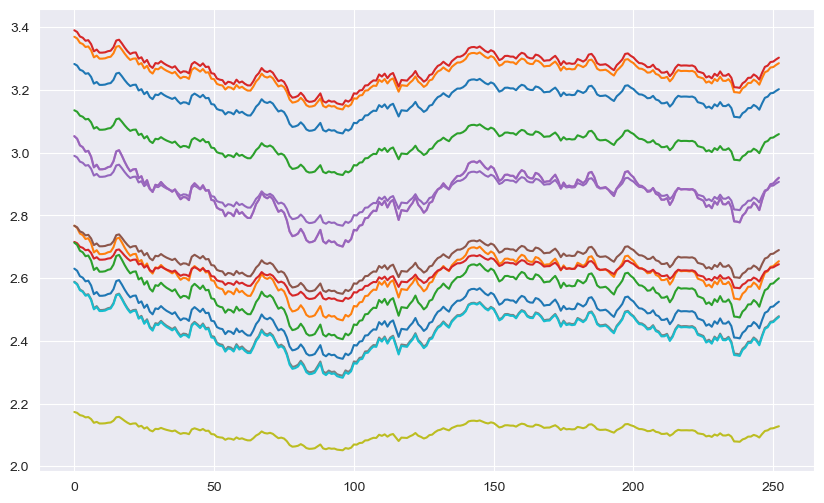

In [64]:
plt.plot(yield_curve)
plt.show()

In [41]:
# 2 factor model to include inflation

inflation = dataset.Inflation()
inflation.read_data()

2023-03-15 16:30:17.413 | INFO     | src.data.dataset:read_data:230 - reading inflation data from ESW.


<Response [200]>

In [42]:
df_i = inflation.df

In [43]:
df_i.head()

,inflation
period,
2003-01-01,2.700
2003-02-01,2.900
2003-03-01,2.700
2003-04-01,2.200
2003-05-01,2.200


In [44]:
inflation_changes = np.log(df_i / df_i.shift(1)).dropna()

c:\Users\M\miniconda3\envs\rlalm\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
c:\Users\M\miniconda3\envs\rlalm\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [52]:
rate_mu = rate_changes.mean().values
rate_sigma = rate_changes.std().values
inflation_mu = inflation_changes.mean().values
inflation_sigma = inflation_changes.std().values

In [54]:
rate_r0 = df1.iloc[-1].values
inflation_r0 = df_i.iloc[-1].values
T = 1
dt = 1/252